In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
%matplotlib inline

In [6]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [9]:
from sklearn import metrics

In [10]:
calories = pd.read_csv("calories.csv")

In [11]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [15]:
calories.shape

(15000, 2)

In [12]:
ex_data = pd.read_csv("exercise.csv")

In [13]:
ex_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [14]:
ex_data.shape

(15000, 8)

In [19]:
#Combining the two DataFrames Main DataFrame
cal_data = pd.concat([ex_data,calories["Calories"]],axis=1)

In [20]:
cal_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [27]:
cal_data.isnull().sum() #No missing Values

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [28]:
cal_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [29]:
sns.set()

No handles with labels found to put in legend.


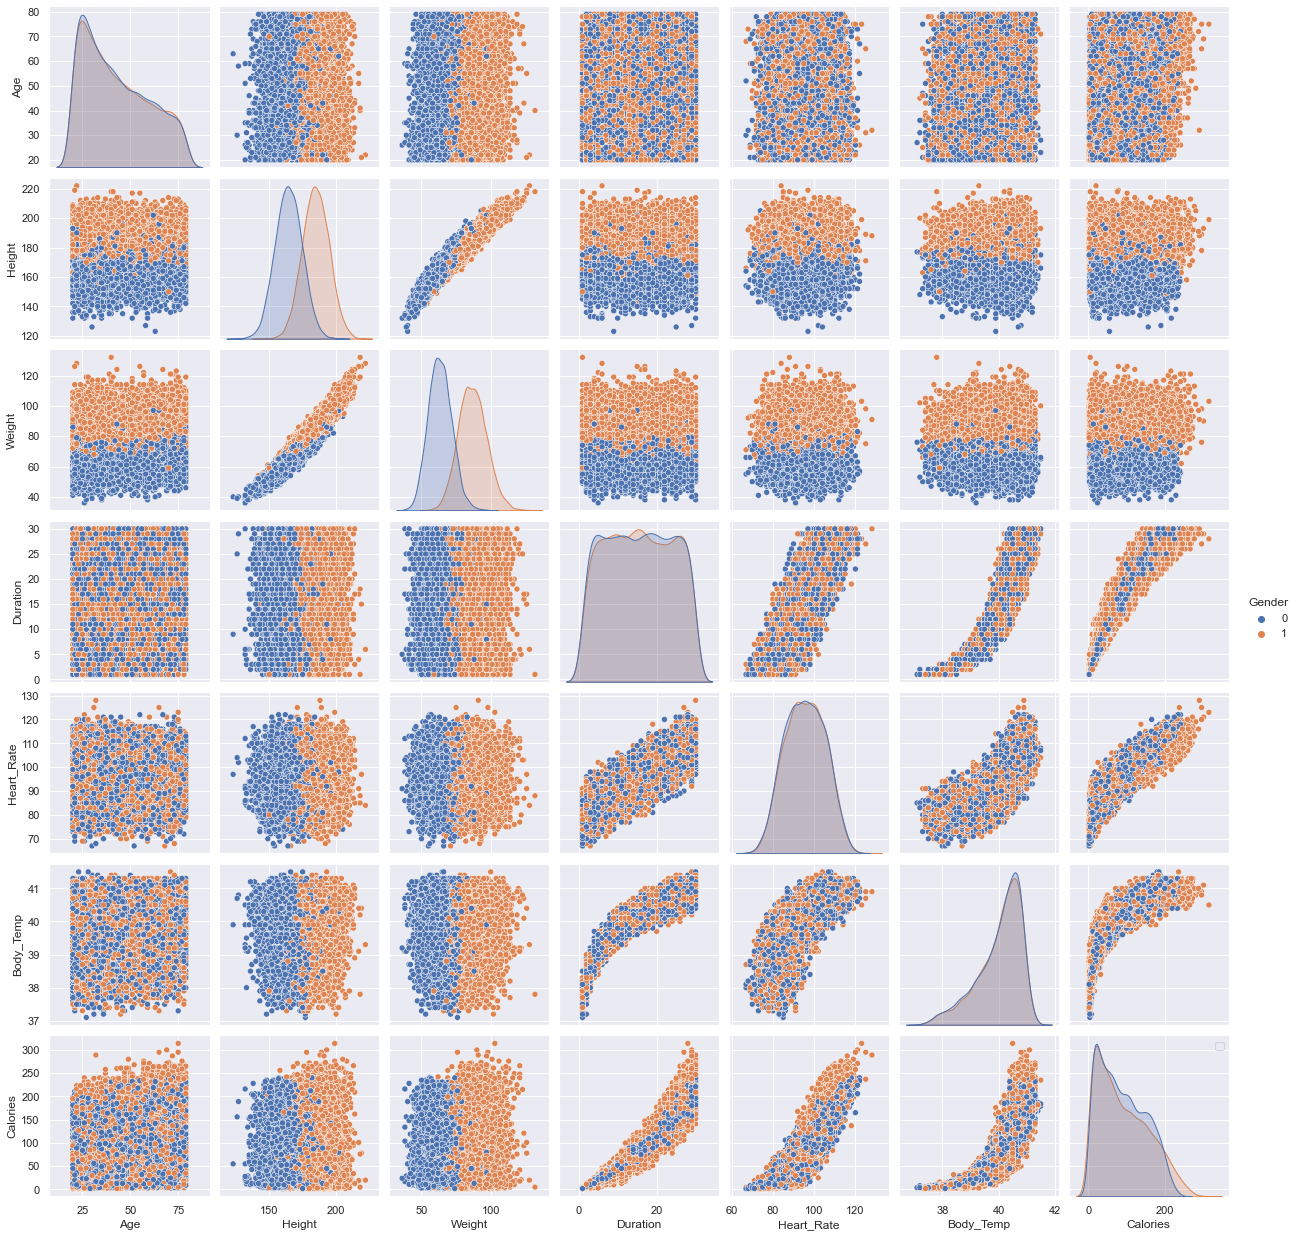

In [108]:
sns.pairplot(data=cal_data.drop("User_ID",axis=1),hue="Gender")
plt.legend()

C:\Users\kulka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

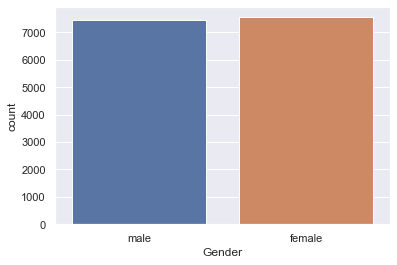

In [39]:
sns.countplot(cal_data["Gender"]

C:\Users\kulka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

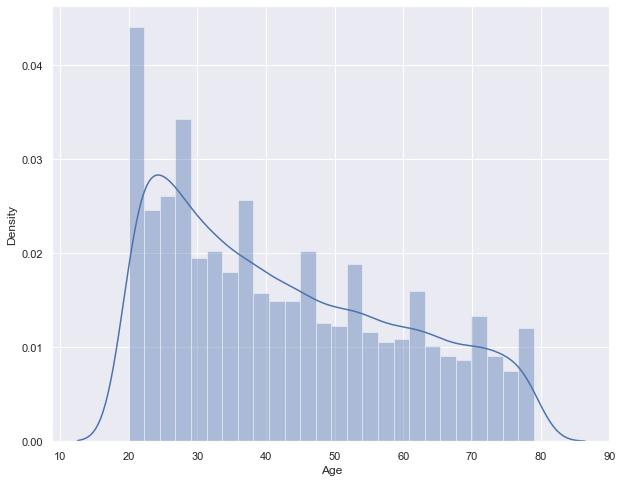

In [42]:
plt.figure(figsize=(10,8))
sns.distplot(cal_data["Age"])

C:\Users\kulka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

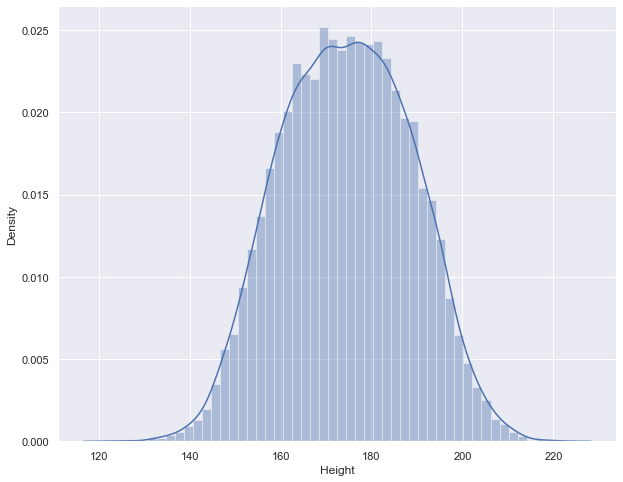

In [43]:
plt.figure(figsize=(10,8))

sns.distplot(cal_data["Height"])

C:\Users\kulka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

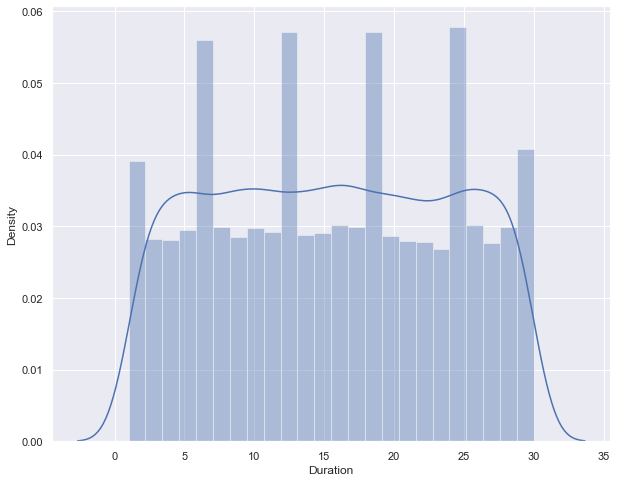

In [44]:
plt.figure(figsize=(10,8))
sns.distplot(cal_data["Duration"])

In [51]:
cal_data.shape

(15000, 9)

In [52]:
correlation = cal_data.drop("User_ID",axis=1)

In [53]:
correlation

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


<AxesSubplot:>

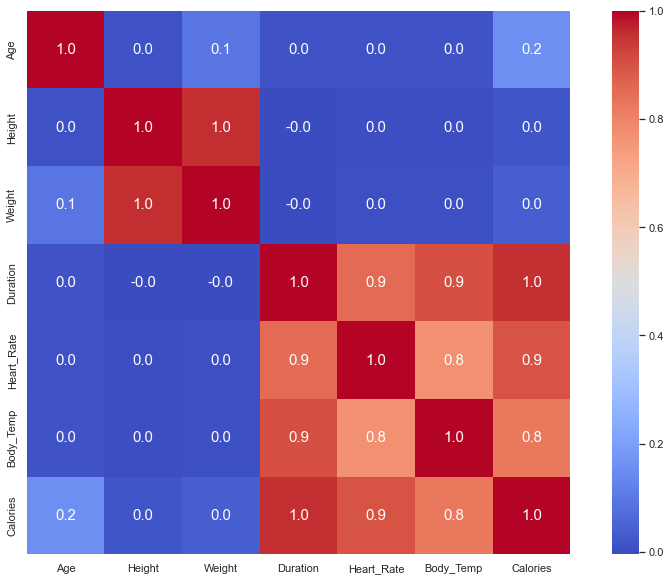

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation.corr(),cbar=True,square=True,fmt='.1f',annot=True,annot_kws={"size":15},cmap="coolwarm")

# Two ways to convert categorical data to numerical 

In [67]:
#1
cal_data1=pd.get_dummies(cal_data["Gender"],drop_first=True)

In [68]:
cal_data1

,male
0,1
1,0
2,1
3,0
4,0
...,...
14995,0
14996,0
14997,0
14998,1


In [71]:
#2
cal_data.replace({"Gender":{"male":1,"female":0}},inplace=True)

In [72]:
cal_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [73]:
cal_data.Gender.value_counts()

0    7553
1    7447
Name: Gender, dtype: int64

In [74]:
# Separating Features And Targets
X = cal_data.drop(["User_ID","Calories"],axis=1)

In [75]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4
14996,0,27,165.0,65.0,6.0,85.0,39.2
14997,0,43,159.0,58.0,16.0,90.0,40.1
14998,1,78,193.0,97.0,2.0,84.0,38.3


In [76]:
y = cal_data["Calories"]

In [77]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

# Splitting Data into Training and Testing

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [79]:
xg = XGBRegressor()

In [81]:
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [82]:
xg_predict = xg.predict(X_test)

In [89]:
def evaluate(a,b):
    print("MAE : ",metrics.mean_absolute_error(a,b))
    print("RMSE : ",np.sqrt(metrics.mean_squared_error(a,b)))
    print("R2 Score :",metrics.r2_score(a,b))

In [90]:
evaluate(y_test,xg_predict)

MAE :  1.5206691969154082
RMSE :  2.1926324259802636
R2 Score : 0.9987455718210164


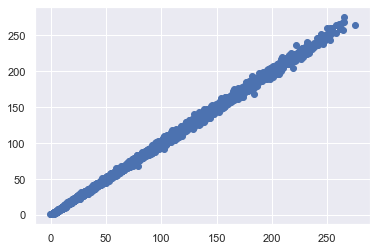

In [91]:
plt.scatter(xg_predict,y_test)

C:\Users\kulka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual')

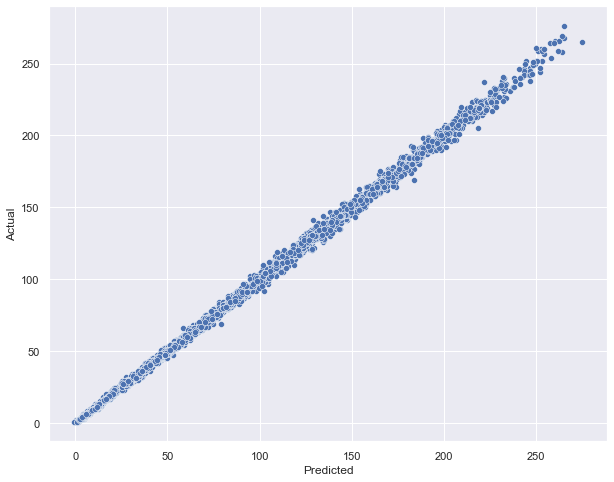

In [97]:
plt.figure(figsize=(10,8))
sns.scatterplot(xg_predict,y_test)
# plt.legend()
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Error Prediction Plot 

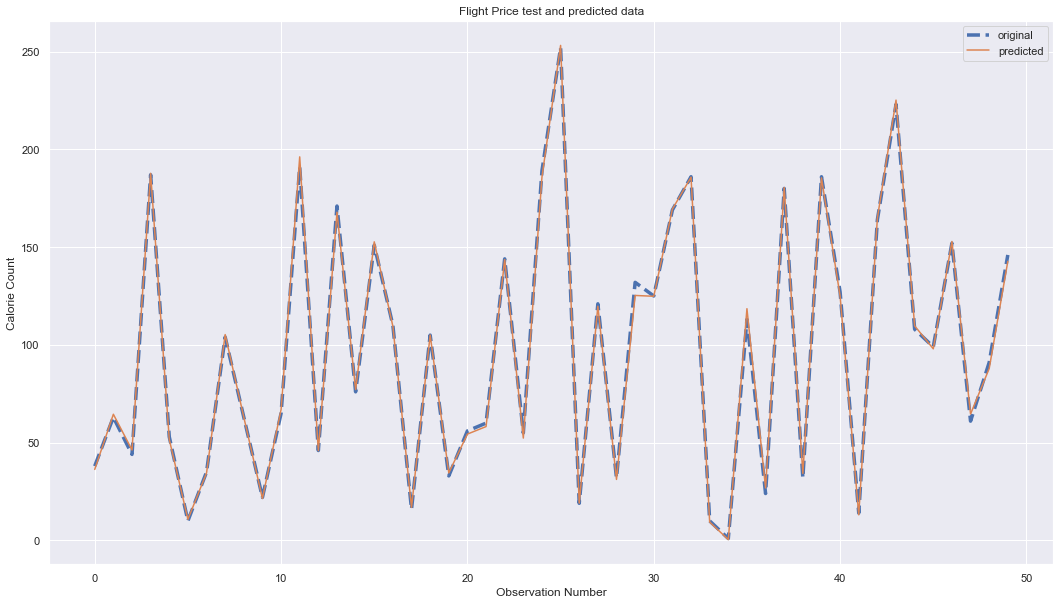

In [102]:
number_of_observations=50
plt.figure(figsize=(18,10))

x_ax = range(len(y_test[:number_of_observations]))

plt.plot(x_ax, y_test[:number_of_observations], label="original",linestyle="--",linewidth=3.5)

plt.plot(x_ax, xg_predict[:number_of_observations], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Calorie Count')


plt.legend()

plt.show()

In [118]:
# Sample Input
cal_data.drop("User_ID",axis=1).head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [119]:
og_input_data = (1,21,171,62,30,95,37)
input_data = np.asarray(og_input_data) 
input_data_reshaped = input_data.reshape(1,-1)

In [120]:
input_data_reshaped

array([[  1,  21, 171,  62,  30,  95,  37]])

In [121]:
predictions = xg.predict(input_data_reshaped)
predictions[0]

122.08194